In [1]:
from model import WGAN_WC
import keras
import numpy as np
import matplotlib.pyplot as plt

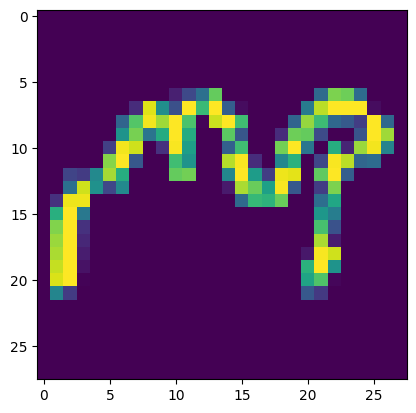

In [2]:
X = np.load("full_numpy_bitmap_camel.npy")
X = np.reshape(X , (len(X),28,28))
X = 2*X/255-1
idx = np.random.randint(0,len(X))
plt.imshow(X[idx])

In [3]:
gan = WGAN_WC(
    input_dim=(28,28,1),
    d_filters=[64,64,128,128],
    d_kernel=[5,5,5,5],
    d_strides=[2,2,2,1],
    d_batch_norm_momentum=None,
    d_activation='relu',
    d_dropout_rate=0.4,
    d_lr=0.0008,
    g_init_dense=(7,7,64),
    g_upsample=[2,2,1,1],
    g_filters=[128,64,64,1],
    g_kernel=[5,5,5,5],
    g_stride=[2,2,1,1],
    g_batch_norm_momentum=0.9,
    g_activation='relu',
    g_dropout_rate=None,
    g_lr=0.0004,
    optimizer='rmsprop',
    z_dim=100
)

gan.discriminator.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 discriminator_input (Input  [(None, 28, 28, 1)]       0         
 Layer)                                                          
                                                                 
 d_conv_0 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 activation_5 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 d_conv_1 (Conv2D)           (None, 7, 7, 64)          102464    
                                                                 
 activation_6 (Activation)   (None, 7, 7, 64)          0         
                                                         

In [4]:
gan.train(X)

Epoch : 0

2/2 [==============================] - 0s 112ms/step
Epoch : 1
2/2 [==============================] - 0s 138ms/step
Epoch : 2
2/2 [==============================] - 0s 126ms/step
Epoch : 3
2/2 [==============================] - 0s 112ms/step
Epoch : 4
2/2 [==============================] - 0s 132ms/step
Epoch : 5
2/2 [==============================] - 0s 120ms/step
Epoch : 6
2/2 [==============================] - 0s 132ms/step
Epoch : 7
2/2 [==============================] - 0s 117ms/step
Epoch : 8
2/2 [==============================] - 0s 115ms/step
Epoch : 9
2/2 [==============================] - 0s 103ms/step
Epoch : 10
2/2 [==============================] - 0s 111ms/step
Epoch : 11
2/2 [==============================] - 0s 106ms/step
Epoch : 12
2/2 [==============================] - 0s 122ms/step
Epoch : 13
2/2 [==============================] - 0s 118ms/step
Epoch : 14
2/2 [==============================] - 0s 119ms/step
Epoch : 15
2/2 [==============================] -

In [5]:
noise = np.random.normal(0,1,(10,100))

In [6]:
fakes = gan.generator.predict(noise)

1/1 [==============================] - 1s 502ms/step


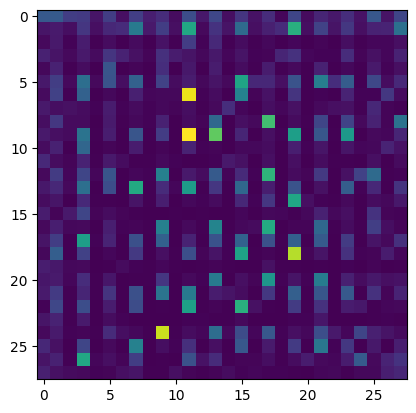

In [7]:
plt.imshow(fakes[5])